In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime 
from tqdm.notebook import tqdm

## Load data

In [2]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [5]:
df['Year Month'] = df['Order Date'].dt.strftime('%Y-%m')
df['Year Month'] = df['Year Month'].astype('datetime64[ns]')

In [6]:
df.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
Order Month        12
Order Year          4
Year Month         48
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Order Month      0
Order Year       0
Year Month       0
dtype: int64

## EDA

In [9]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Month', 'Order Year', 'Year Month'],
      dtype='object')

In [10]:
for col in ['Category', 'Sub Category', 'City', 'Region', 'State','Order Month','Order Year']:
    print(f'Unique values of {col}:',df[col].unique())
    print('-----')

Unique values of Category: ['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']
-----
Unique values of Sub Category: ['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' 'Organic Vegetables' 'Noodles' 'Organic Fruits' 'Fish'
 'Spices' 'Rice' 'Breads & Buns']
-----
Unique values of City: ['Vellore' 'Krishnagiri' 'Perambalur' 'Dharmapuri' 'Ooty' 'Trichy'
 'Ramanadhapuram' 'Tirunelveli' 'Chennai' 'Karur' 'Namakkal' 'Dindigul'
 'Kanyakumari' 'Bodi' 'Tenkasi' 'Viluppuram' 'Madurai' 'Salem' 'Cumbum'
 'Nagercoil' 'Pudukottai' 'Theni' 'Coimbatore' 'Virudhunagar']
-----
Unique values of Region: ['North' 'South' 'West' 'Central' 'East']
-----
Unique values of State: ['Tamil Nadu']
-----
Unique values of Order Month: [11  6 10  4 12  5  8  7  9  1  3  2]
-----
Unique values of Order Year: [

In [11]:
df.describe()

,Sales,Discount,Profit,Order Month,Order Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082,7.809686,2016.722233
std,577.559036,0.074636,239.932881,3.284654,1.123555
min,500.000000,0.100000,25.250000,1.000000,2015.000000
25%,1000.000000,0.160000,180.022500,5.000000,2016.000000
50%,1498.000000,0.230000,320.780000,9.000000,2017.000000
75%,1994.750000,0.290000,525.627500,11.000000,2018.000000
max,2500.000000,0.350000,1120.950000,12.000000,2018.000000


### Setup style for charts

In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [73]:
plt.style.use('ggplot')

### Correlation

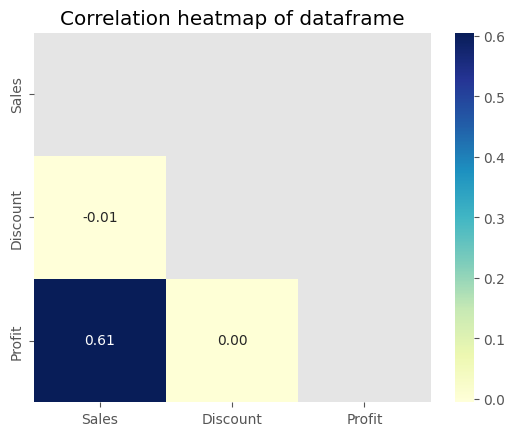

In [41]:
df_temp = df.copy()

df_temp['Order Month'] = pd.Categorical(df_temp['Order Month'],ordered=True)
df_temp['Order Year'] = pd.Categorical(df_temp['Order Year'],ordered=True)

sns.heatmap(df_temp.corr(numeric_only=True)
            ,annot=True
            ,cmap = 'YlGnBu'
            ,fmt = '.2f'
            ,mask = np.triu(df_temp.corr(numeric_only=True))
            )
plt.title('Correlation heatmap of dataframe')
plt.show()

### Distributions

C:\Users\MSI\AppData\Local\Temp\ipykernel_3632\2406549735.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


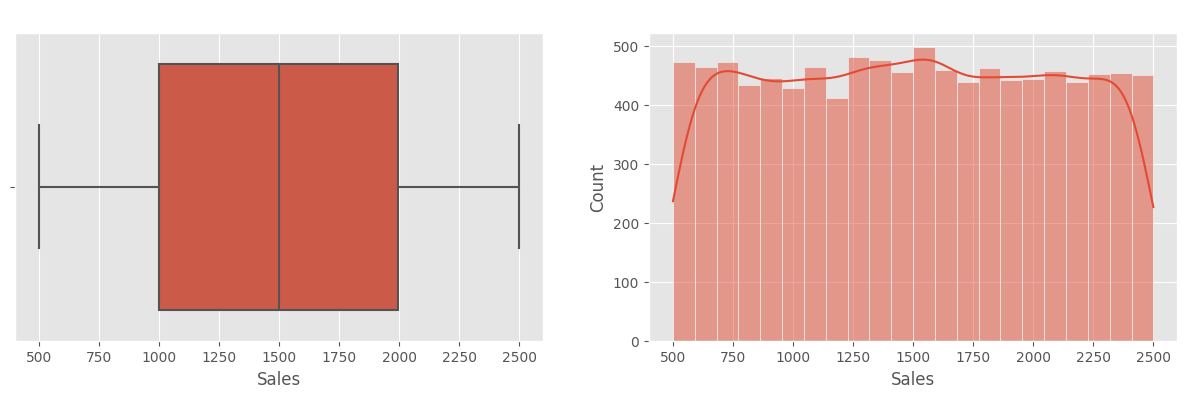

In [74]:
fig, axes = plt.subplots(ncols=2
             ,nrows=1
             ,figsize = (15,4))

sns.boxplot(data = df
            , x = 'Sales'
            , ax = axes[0])

sns.histplot(data = df
             ,x = 'Sales'
             ,kde= True
             , ax = axes[1])

axes[0].set_title('Boxplot of Sales Value')
axes[1].set_title('Distribution of Sales Value')

fig.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_3632\3589130976.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


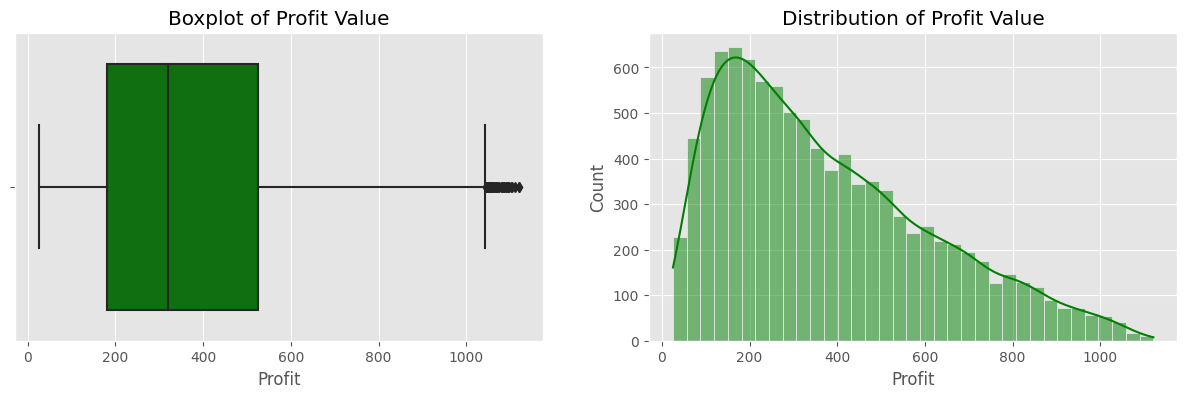

In [15]:
fig, axes = plt.subplots(ncols=2
             ,nrows=1
             ,figsize = (15,4))

sns.boxplot(data = df
            , x = 'Profit'
            , ax = axes[0]
            ,color = 'green')

sns.histplot(data = df
             ,x = 'Profit'
             ,kde= True
             ,ax = axes[1]
             ,color = 'green')

axes[0].set_title('Boxplot of Profit Value')
axes[1].set_title('Distribution of Profit Value')

fig.show()

In [48]:
Profits_Q1 = df['Profit'].quantile(0.25)
Profits_Q2 = df['Profit'].quantile(0.5)
Profits_Q3 = df['Profit'].quantile(0.75)
Profits_IQR = Profits_Q3 - Profits_Q1
Profits_upperbound = Profits_Q3 + 1.5*Profits_IQR
Profits_lowerbound = Profits_Q1 - 1.5*Profits_IQR

print('Upper Bound:', Profits_upperbound)
print('Lower Bound:', Profits_lowerbound)

Upper Bound: 1044.035
Lower Bound: -338.385


In [49]:
df.loc[(df['Profit'] > Profits_upperbound)|(df['Profit'] < Profits_lowerbound), 'Profit Type'] = 'Outlier'
df['Profit Type'].fillna('Normal',inplace=True)

In [54]:
df_agg = df.groupby(by = ['Profit Type','Profit'],as_index=False).agg(count = ('Discount','sum'))

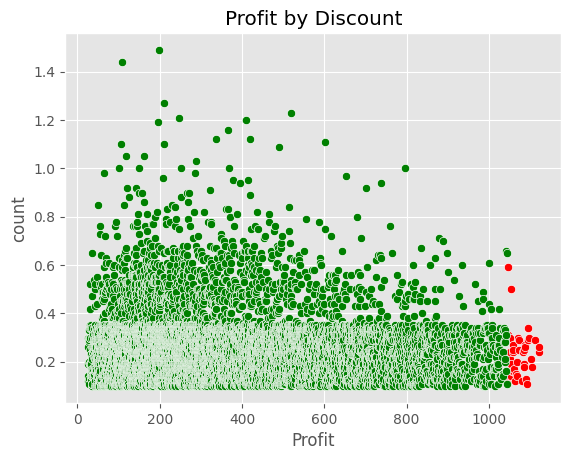

In [57]:
sns.scatterplot(data=df_agg[df_agg['Profit Type'] == 'Outlier']
                ,x = 'Profit'
                ,y = 'count'
                ,color = 'red')

sns.scatterplot(data=df_agg[df_agg['Profit Type'] == 'Normal']
                ,x = 'Profit'
                ,y = 'count'
                ,color = 'green')

plt.title('Profit by Discount')
plt.show()

### By Dates

In [17]:
df_date = df.groupby(by = 'Year Month', as_index= False).agg(count_orders = ('Order ID','nunique')
                                                                ,no_customers = ('Customer Name','nunique')
                                                                ,sum_sales = ('Sales','sum')
                                                                ,sum_profits = ('Profit','sum'))

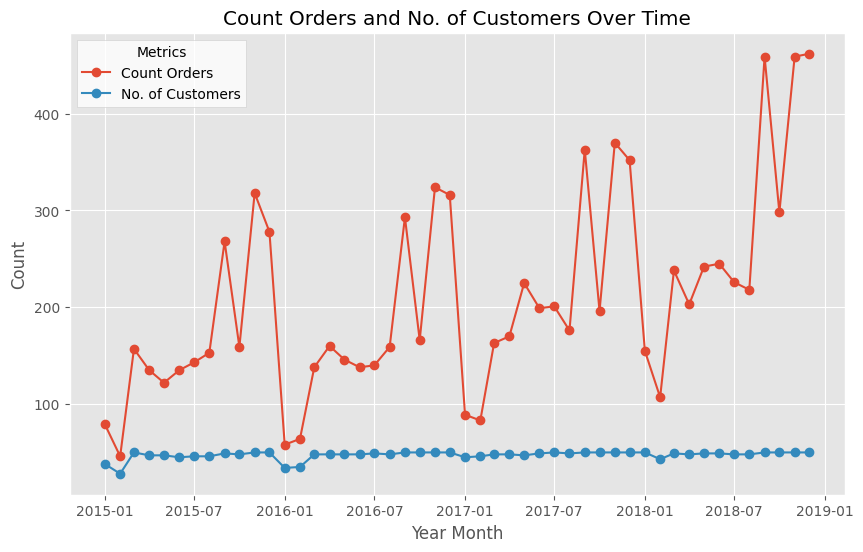

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(df_date['Year Month'], df_date['count_orders'], label='Count Orders', marker='o')
plt.plot(df_date['Year Month'], df_date['no_customers'], label='No. of Customers', marker='o')

plt.title('Count Orders and No. of Customers Over Time')
plt.xlabel('Year Month')
plt.ylabel('Count')
plt.legend(title = 'Metrics'
           ,fancybox = False
           ,facecolor = 'white')

plt.grid(True)
plt.show()

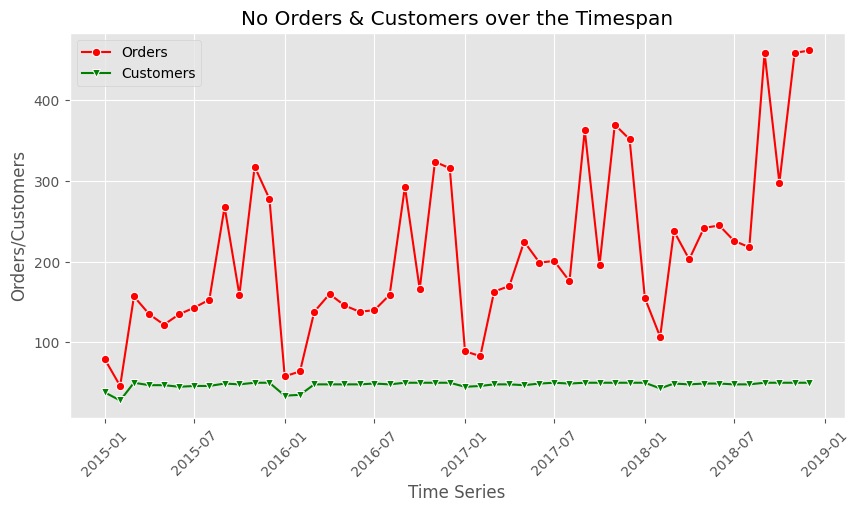

In [19]:
plt.figure(figsize=(10,5))

sns.lineplot(data = df_date
             ,x = 'Year Month'
             ,y = 'count_orders'
             ,label = 'Orders'
             ,marker = 'o'
             ,color = 'red')

sns.lineplot(data = df_date
             ,x = 'Year Month'
             ,y = 'no_customers'
             ,label = 'Customers'
             ,marker = 'v'
             ,color = 'green')

plt.legend(loc = 'upper left'
           , bbox_to_anchor = (0,1))

plt.xlabel('Time Series')
plt.ylabel('Orders/Customers')
plt.title('No Orders & Customers over the Timespan')
plt.xticks(rotation = 45)

plt.show()


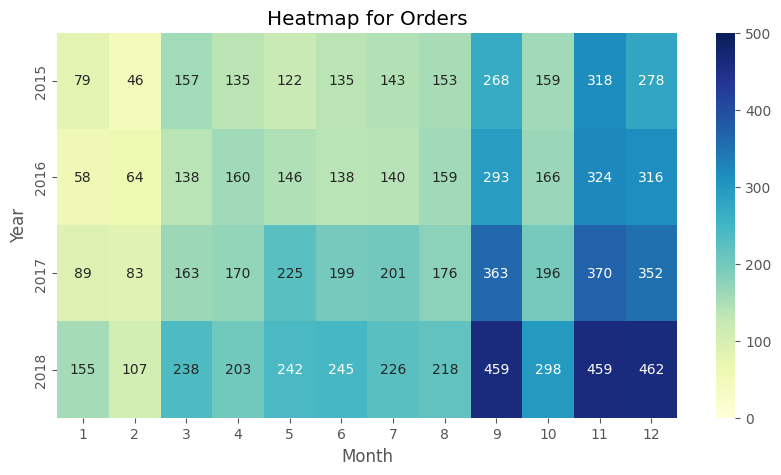

In [20]:
df_heatmap_time = df.pivot_table(values = 'Order ID'
                                ,columns = 'Order Month'
                                ,index = 'Order Year'
                                ,aggfunc='nunique')

plt.figure(figsize=(10,5))

sns.heatmap(df_heatmap_time
            ,annot=True
            ,cmap = 'YlGnBu'
            ,fmt = 'g'
            ,vmax = 500
            ,vmin= 0
            ,)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap for Orders')
plt.show()

In [21]:
list_region = df['Region'].unique()
list_region

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [22]:
list_region[1]

'South'

In [23]:
for i in tqdm(range(0,len(list_region))):
    print(i)

  0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3
4


  0%|          | 0/5 [00:00<?, ?it/s]

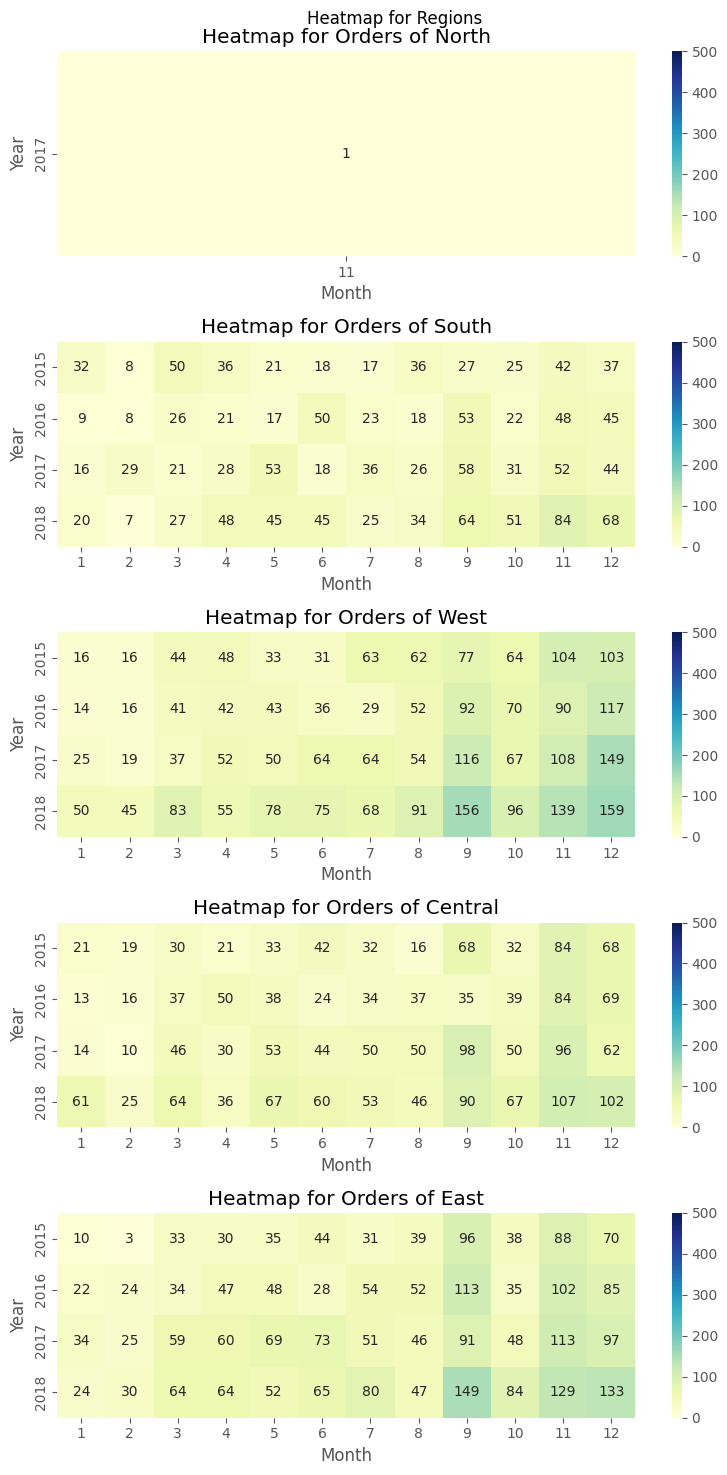

In [61]:
fig, axes = plt.subplots(ncols = 1
                        ,nrows = 5
                        ,figsize = (8,15)
                        ) 

list_region = df['Region'].unique()

for i in tqdm(range(0,len(list_region))):
    df_region = df[df['Region'] == list_region[i]]

    df_heatmap_time_by_region = df_region.pivot_table(values = 'Order ID'
                                                    ,columns = 'Order Month'
                                                    ,index = 'Order Year'
                                                    ,aggfunc='nunique')
        
    sns.heatmap(df_heatmap_time_by_region
                ,annot=True
                ,cmap = 'YlGnBu'
                ,fmt = 'g'
                ,vmax = 500
                ,vmin= 0
                ,ax=axes[i])

    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Year')
    axes[i].set_title(f'Heatmap for Orders of {list_region[i]}')

plt.suptitle('Heatmap for Regions')
plt.tight_layout()
plt.show()

### By Regions

In [25]:
df_regions = df.groupby(by = ['Order Year','Region'], as_index= False).agg(count_orders = ('Order ID','nunique')
                                                                    ,no_customers = ('Customer Name','nunique')
                                                                    ,sum_sales = ('Sales','sum')
                                                                    ,sum_profits = ('Profit','sum'))

In [62]:
df_regions

,Order Year,Region,count_orders,no_customers,sum_sales,sum_profits
0,2015,Central,466,50,689710,176739.48
1,2015,East,517,50,773288,196158.27
2,2015,South,349,50,525032,136864.58
3,2015,West,661,50,987569,242766.78
4,2016,Central,476,50,701119,172575.47
5,2016,East,644,50,970983,249641.74
6,2016,South,340,50,509161,133710.04
7,2016,West,642,50,950696,241265.74
8,2017,Central,603,50,904462,223122.06
9,2017,East,766,50,1132477,282176.79


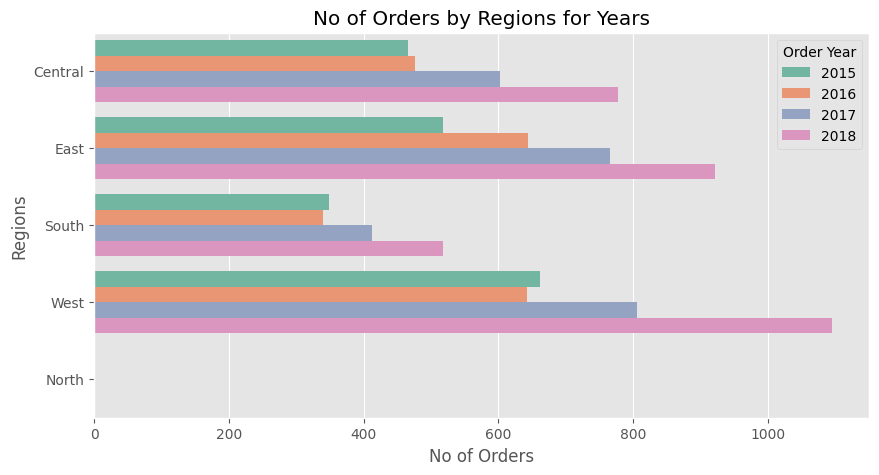

In [66]:
plt.figure(figsize = (10,5))

sns.barplot(data = df_regions
            ,y = 'Region'
            ,x = 'count_orders'
            ,hue = 'Order Year'
            ,palette='Set2')

plt.xlabel('No of Orders')
plt.ylabel('Regions')
plt.title('No of Orders by Regions for Years')
plt.show()

### By Customers

In [27]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Month', 'Order Year', 'Year Month'],
      dtype='object')

In [28]:
df_customers = df.groupby(by = 'Customer Name', as_index= False).agg(count_orders = ('Order ID','nunique')
                                                                ,sum_sales = ('Sales','sum')
                                                                ,sum_profits = ('Profit','sum'))

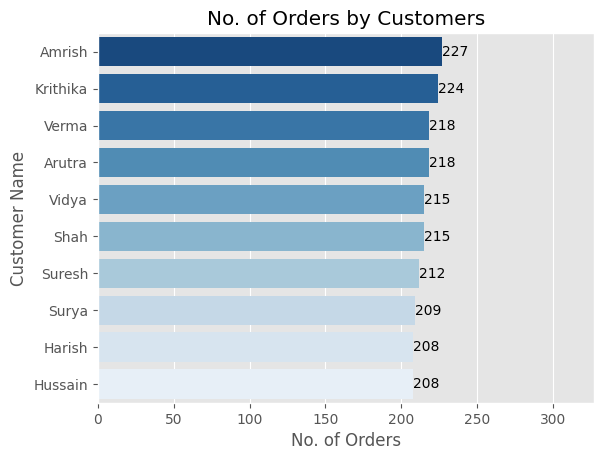

In [68]:
ax = sns.barplot(data = df_customers.sort_values(by = 'count_orders',ascending = False).head(10)
                ,x = 'count_orders'
                ,y = 'Customer Name'
                ,palette= 'Blues_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlim(0, max(df_customers['count_orders'])+100)
plt.xlabel('No. of Orders')
plt.ylabel('Customer Name')
plt.title('No. of Orders by Customers')
plt.show()

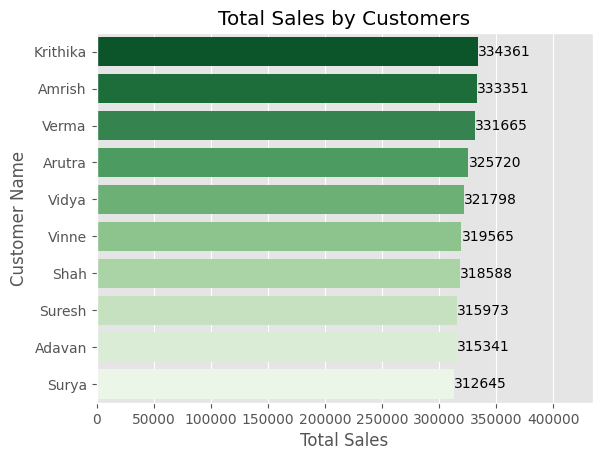

In [59]:
ax = sns.barplot(data = df_customers.sort_values(by = 'sum_sales',ascending = False).head(10)
                ,x = 'sum_sales'
                ,y = 'Customer Name'
                ,palette= 'Greens_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlim(0, max(df_customers['sum_sales'])+100000)
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Total Sales by Customers')
plt.show()

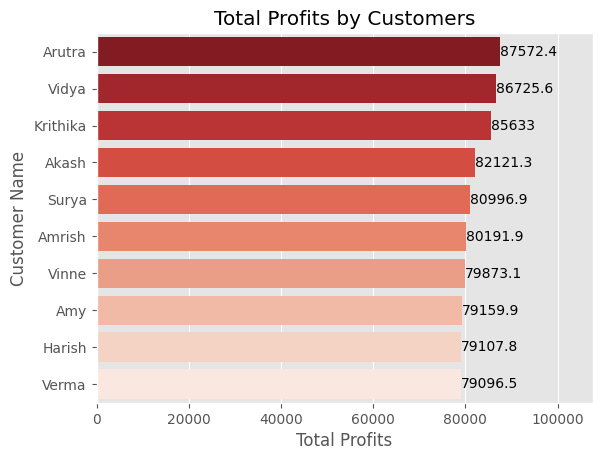

In [58]:
ax = sns.barplot(data = df_customers.sort_values(by = 'sum_profits',ascending = False).head(10)
                ,x = 'sum_profits'
                ,y = 'Customer Name'
                ,palette= 'Reds_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.xlim(0, max(df_customers['sum_profits'])+20000)
plt.xlabel('Total Profits')
plt.ylabel('Customer Name')
plt.title('Total Profits by Customers')
plt.show()